### installation

pip install torch==1.8.1+rocm -f https://download.pytorch.org/whl/rocm.html

pip install torchvision==0.9.1+rocm -f https://download.pytorch.org/whl/rocm.html

pip install torchaudio===0.8.1



!git clone https://github.com/ultralytics/yolov5.git


In [1]:
import torch
import matplotlib.pyplot as plt 
import numpy as np 
import cv2

In [2]:
preTrainedModel= torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /home/alchemist-linux/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-1-11 Python-3.12.3 torch-2.5.1+cu124 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [3]:
result = preTrainedModel('./image.png')
result

/home/alchemist-linux/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


YOLOv5 <class 'models.common.Detections'> instance
image 1/1: 768x768 15 persons, 2 cars, 3 buss, 2 backpacks, 1 umbrella, 2 handbags, 2 suitcases
Speed: 22.0ms pre-process, 85.6ms inference, 5.0ms NMS per image at shape (1, 3, 640, 640)

In [4]:
imageSize =result.render()
imageSize[0].shape

(768, 768, 3)

In [5]:
squeezedImg = np.squeeze(imageSize)
squeezedImg.shape

(768, 768, 3)

### lets see how pretrained model preform on crowdy image

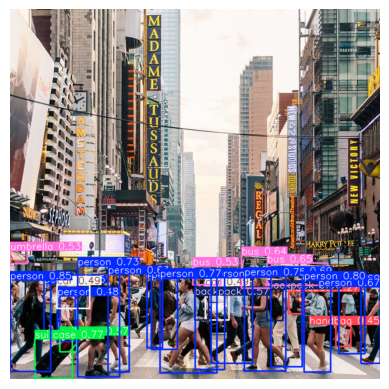

In [6]:
%matplotlib inline 
#this ensures matplotlib will display the plots right inside the notebook after executing the cell. 
plt.imshow(squeezedImg)
plt.axis('off')
plt.show()

### video check with cv2

In [7]:
cap = cv2.VideoCapture('./traffic.mp4')

while cap.isOpened(): 
    ret, frame = cap.read()
    
    if not ret:
        print("Failed to grab frame")
        break
    
    result = preTrainedModel(frame)
    rendered_frame = np.squeeze(result.render())
    cv2.imshow('objectDetect', rendered_frame)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release() 
cv2.destroyAllWindows()

/home/alchemist-linux/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/alchemist-linux/Desktop/Object detection project/.venv/lib/python3.12/site-packages/cv2/qt/plugins"
/home/alchemist-linux/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/home/alchemist-linux/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/home/alchemist-linux/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `t

Failed to grab frame


/home/alchemist-linux/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/home/alchemist-linux/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


### labeling our images to categorize them

!git clone https://github.com/tzutalin/labelImg

!pip install pyqt5 lxml --upgrade

!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

LabelImg is a graphical annotation tool for creating bounding boxes and labeling objects in images, essential for preparing datasets for object detection tasks. It supports formats like Pascal VOC (XML) and YOLO (TXT) for training models. Users manually draw boxes, assign labels, and save annotations for model training.


In [66]:
!cd yolov5 && python train.py --img 256 --batch 32 --epochs 250 --data dataset.yml --weights yolov5s.pt --workers 4


train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=250, batch_size=32, imgsz=256, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=4, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: skipping check (offline), for updates see https://github.com/ultralytics/yolov5
fatal: cannot change to '/home/alchemist-linux/Desktop/Object': No such file or directory
YOLOv5 🚀 2025-1-11 Python-3.12.3 torch-2.5.1+cu124 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=

### lets load the model

In [67]:
model = torch.hub.load('ultralytics/yolov5' , 'custom' , path='yolov5/runs/train/exp18/weights/last.pt')
model

Using cache found in /home/alchemist-linux/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-1-11 Python-3.12.3 torch-2.5.1+cu124 CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

### testing the model

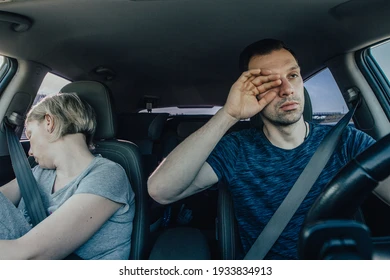

In [95]:
import os 
from IPython.display import Image 
testImage = os.path.join('data/images/bored-people-drive-car-together-260nw-1933834913.webp')
Image(testImage)

In [96]:
result = model(testImage)
result

/home/alchemist-linux/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


YOLOv5 <class 'models.common.Detections'> instance
image 1/1: 280x390 2 drowsys
Speed: 3.9ms pre-process, 73.6ms inference, 0.4ms NMS per image at shape (1, 3, 480, 640)

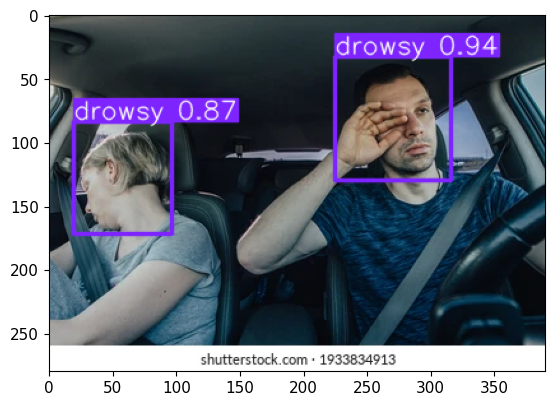

In [97]:
showResult = plt.imshow(np.squeeze(result.render()))

In [98]:
cap = cv2.VideoCapture('./me.mp4')

while cap.isOpened(): 
    ret, frame = cap.read()
    
    if not ret:
        print("Failed to grab frame")
        break
    
    result = model(frame)
    rendered_frame = np.squeeze(result.render())
    cv2.imshow('objectDetect', rendered_frame)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release() 
cv2.destroyAllWindows()

/home/alchemist-linux/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/home/alchemist-linux/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/home/alchemist-linux/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/home/alchemist-linux/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/home/alchemist-linux/.cache/torch/h